

```
# This is formatted as code
The aim of this project is to learn embeddings from the pride and prejudice book. We use nltk library and load the dataset. Lets have a look 



In [1]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#create a pipeline for text processing 
# load data
filename = 'prideandprejudice.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0])
#tokenize each sentence 
from nltk.tokenize import word_tokenize
tokens = [ word_tokenize(i) for i in sentences]
#lowercase the letters 
import string
table = str.maketrans('', '', string.punctuation)
for i in range(len(tokens)):
  for j in range(len(tokens[i])):
    tokens[i][j]=tokens[i][j].lower()
    tokens[i][j]=tokens[i][j].translate(table)
tokens[0]
#next remove the words from the row which is not allphabetic 
for i in range(len(tokens)):
  tokens[i]=[w for w in tokens[i] if w.isalpha()]
#filter out the stop words from the corpus 
for i in range(len(tokens)):
  tokens[i]=[w for w in tokens[i] if w.isalpha()]
tokens[0]

﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.


['project',
 'gutenberg',
 'ebook',
 'of',
 'pride',
 'and',
 'prejudice',
 'by',
 'jane',
 'austen',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever']

In [3]:
#use the gensim libraru to learn the embeddings
!pip install -U gensim 


    100% |████████████████████████████████| 24.2MB 2.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
#lets now learn the embeddings on the tokens(list of sentences)
from gensim.models import Word2Vec
model = Word2Vec(tokens, min_count=1,size=100)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['a'])
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


Word2Vec(vocab=6664, size=100, alpha=0.025)
['project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice', 'by', 'jane', 'austen', 'this', 'is', 'for', 'the', 'use', 'anyone', 'anywhere', 'at', 'no', 'cost', 'with', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'away', 'or', 'reuse', 'under', 'terms', 'license', 'included', 'online', 'wwwgutenbergorg', 'title', 'author', 'posting', 'date', 'august', 'release', 'june', 'last', 'updated', 'march', 'language', 'english', 'character', 'set', 'encoding', 'start', 'produced', 'anonymous', 'volunteers', 'chapter', 'a', 'truth', 'universally', 'acknowledged', 'that', 'single', 'man', 'in', 'possession', 'good', 'fortune', 'must', 'be', 'want', 'wife', 'however', 'little', 'known', 'feelings', 'views', 'such', 'on', 'his', 'first', 'entering', 'neighbourhood', 'so', 'well', 'fixed', 'minds', 'surrounding', 'families', 'he', 'considered', 'rightful', 'property', 'some', 'one', 'other', 'their', 'daughters', 'm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

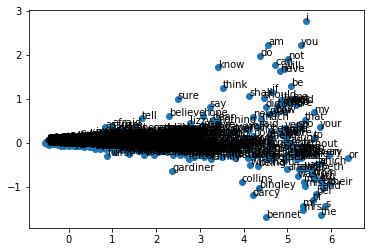

In [6]:
from matplotlib import pyplot
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Learning our own embeddings is ok .But the best way is to use the google news dataset from kaggle. So let us configure the google news datasaet here 


In [7]:
ls

kaggle.json  prideandprejudice.txt  sample_data/


In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [9]:
#upload kaggle api 
from google.colab import files
files.upload()

{}

In [0]:
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets list
!kaggle datasets download -d sandreds/googlenewsvectorsnegative300


ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          36196  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          24663  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           5296  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          25294  
bigquery/crypto-ethereum-classic                          

In [0]:
from zipfile import ZipFile 


In [13]:
ls

googlenewsvectorsnegative300.zip  prideandprejudice.txt
kaggle.json                       sample_data/


In [14]:
file_name = "googlenewsvectorsnegative300.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
GoogleNews-vectors-negative300.bin             2017-11-29 17:05:40   3644258522
Extracting all the files now...
Done!


In [0]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [16]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


In [17]:
!kaggle datasets download -d takuok/glove840b300dtxt

100% 2.08G/2.08G [00:24<00:00, 113MB/s]
100% 2.08G/2.08G [00:24<00:00, 91.9MB/s]


In [18]:
file_name = "glove840b300dtxt.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
glove.840B.300d.txt                            2017-12-31 06:22:52   5646239124
Extracting all the files now...
Done!
